## Extract FLASH Data in yt
Mirielle Wong

6/21/24

Use yt's covering_grid class to extract data from FLASH.

In [3]:
# https://yt-project.org/

import yt
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [4]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "~/cellar/OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

In [5]:
ds = yt.load(plot_path)

yt : [INFO     ] 2024-09-16 16:35:41,844 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-09-16 16:35:41,869 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-09-16 16:35:41,869 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-09-16 16:35:41,870 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-09-16 16:35:41,870 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-09-16 16:35:41,870 Parameters: cosmological_simulation   = 0


In [6]:
list(ds.fields.flash)

[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [7]:
print(ds.domain_dimensions)
domain_left_edge = [-0.6, -0.075, -0.6]    # from info printed in yt.load

[288 272 288]


In [8]:
# this is from the yt documentation

level = 2
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [9]:
# relevant vars

# print(x.units)
print(ds.length_unit)
print(ds.mass_unit)
print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[1152 1088 1152]
[288 272 288]
2


In [10]:
data_level0 = ds.covering_grid(
    0, # adjust this
    left_edge=domain_left_edge,
    dims=ds.domain_dimensions
)

In [23]:
# check shape
data_level0['index', 'dy'][0,21:,z_middle_index]

unyt_array([0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00395221,
            0.00395221, 0.00395221, 0.00395221, 0.00395221, 0.00

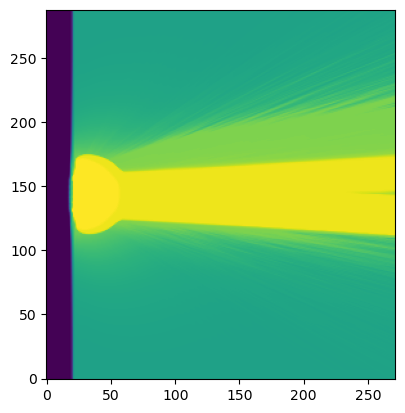

In [12]:
# we can create a df for any any field in ds.fields.flash
# There are a couple steps to the indexing we want to do.
# First, we need to find the middle index of the z axis.
z_middle_index = ds.domain_dimensions[2] // 2
ye = np.array(data_level0['flash', 'ye'][:, :, z_middle_index])
plt.imshow(ye, origin='lower')

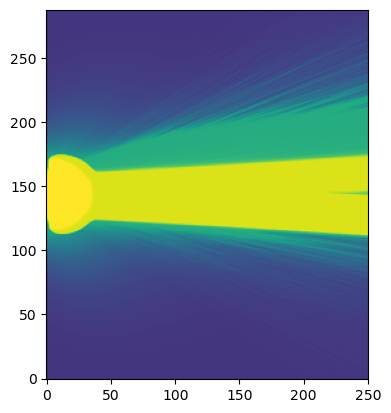

In [16]:
# Next, we need to trim the data so that the target is not included, this just needs to be trial and error
target_index = 21
ye = np.array(data_level0['flash', 'ye'][:, target_index:, z_middle_index])
plt.imshow(ye, origin='lower')

# tion = np.ndarray(data_level0['flash', 'tion'][:, :, 0])

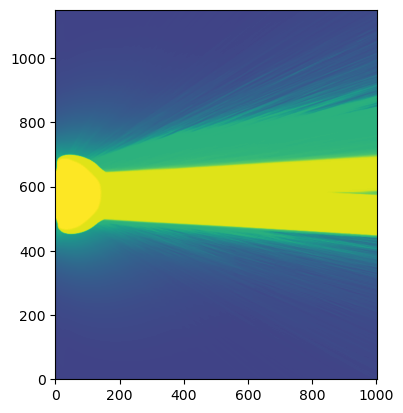

In [25]:
# Try the same procedure but for a higher resolution. Might make the simulation a little bettter
z_middle_index = dims[2] // 2
ye = np.array(all_data['flash', 'ye'][:, :, z_middle_index])
plt.imshow(ye, origin='lower')

target_index = 84
ye = np.array(all_data['flash', 'ye'][:, target_index:, z_middle_index])
plt.imshow(ye, origin='lower')


I think that we'll go with this resolution, just to be safe.

In [27]:
def get_slice(all_data, fields, target_index=84):
    z_middle_index = dims[2] // 2
    for field in fields:
        field_data = np.array(all_data['flash', field][:, target_index:, z_middle_index])
        np.save(f"FLASH-slices/{field}.npy", field_data)

fields = ['tion']

get_slice(all_data, fields)

FileNotFoundError: [Errno 2] No such file or directory: 'FLASH-slices/tion.npy'